Week 7 - 11th June 2024, Advance Python AI and ML tools

1. Categorical vs Numerical <br>
2. Feature Scaling <br>
3. Normalization - scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. <br>


### Normalization


In [125]:
import numpy as np
from sklearn import preprocessing

In [126]:
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])


In [127]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

In [128]:
scaled_feature = minmax_scale.fit_transform(feature)

In [129]:
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [130]:
feature1 = np.array([[1],
                    [5],
                    [10],
                    [6],
                    [100]])
scaled_feature1 = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(feature1)
scaled_feature1

array([[0.        ],
       [0.04040404],
       [0.09090909],
       [0.05050505],
       [1.        ]])

### Standardization

#### Standardization > Normalization

scalling technique in which values are centered zero mean with the SD of 1

In [131]:
x = np.array([[-1000.1],
              [-200.2],
              [500.5],
              [600.6],
              [9000.9]])
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(x)

In [132]:
standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

### Outliers

detect using <br>
1. IQR <br>
2. Visualization techniques

In [133]:
import pandas as pd
df = pd.read_csv("Practice_File.csv", usecols = ["LotArea","SalePrice"])

In [134]:
df.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


In [135]:
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [136]:
df.shape

(1460, 2)

In [137]:
df.isnull().sum()

LotArea      0
SalePrice    0
dtype: int64

#### 1. using IQR

In [138]:
q1 = df["SalePrice"].quantile(0.25)
q3 = df["SalePrice"].quantile(0.75)

IQR = q3 - q1
print(f"q1 : {q1}")
print(f"q3 : {q3}")
print(f"IQR : {IQR}")

q1 : 129975.0
q3 : 214000.0
IQR : 84025.0


In [139]:
lower_whisker = q1 - (1.5 * IQR)
upper_whisker = q3 + (1.5 * IQR)
print(f"lower whisker : {lower_whisker}")
print(f"upper whisker : {upper_whisker}")

lower whisker : 3937.5
upper whisker : 340037.5


In [140]:
print((df["SalePrice"]<lower_whisker) | (df["SalePrice"]>upper_whisker))

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


### creating the new dataframe keeping the non-outliers based on the whiskers.

In [141]:
df.shape

(1460, 2)

In [142]:
new_df = df[(df["SalePrice"]>lower_whisker) & (df["SalePrice"]<upper_whisker)]
new_df.shape

(1399, 2)

In [143]:
1460 - 1399

61

challenge qsn

In [144]:
new_q1 = df.quantile(0.25)
new_q3 = df.quantile(0.75)

new_IQR = new_q3 - new_q1
print(f"q1 : {new_q1}")
print(f"q3 : {new_q3}")
print(f"IQR : {new_IQR}")

q1 : LotArea        7553.5
SalePrice    129975.0
Name: 0.25, dtype: float64
q3 : LotArea       11601.5
SalePrice    214000.0
Name: 0.75, dtype: float64
IQR : LotArea       4048.0
SalePrice    84025.0
dtype: float64


In [145]:
nlower_whisker = new_q1 - (1.5 * new_IQR)
nupper_whisker = new_q3 + (1.5 * new_IQR)
print(f"lower whisker : {nlower_whisker}")
print(f"upper whisker : {nupper_whisker}")

lower whisker : LotArea      1481.5
SalePrice    3937.5
dtype: float64
upper whisker : LotArea       17673.5
SalePrice    340037.5
dtype: float64


In [146]:
nnew_df = df[(df>nlower_whisker) & (df<nupper_whisker)]
nnew_df.shape

(1460, 2)

In [147]:
df.shape

(1460, 2)

#### 2. Using Visualization technique
outlier detection

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4dbd4f350>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4db9e8d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4dbd4f610>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4dbd78410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4dbd59a90>],
 'means': []}

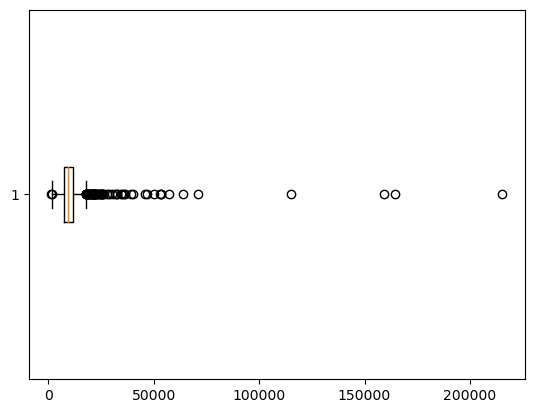

In [148]:
import matplotlib.pyplot as plt
plt.boxplot(df["LotArea"], vert = False)

challenge question <br>
1. add axis title <br>
2. plot vertical for SalePrice

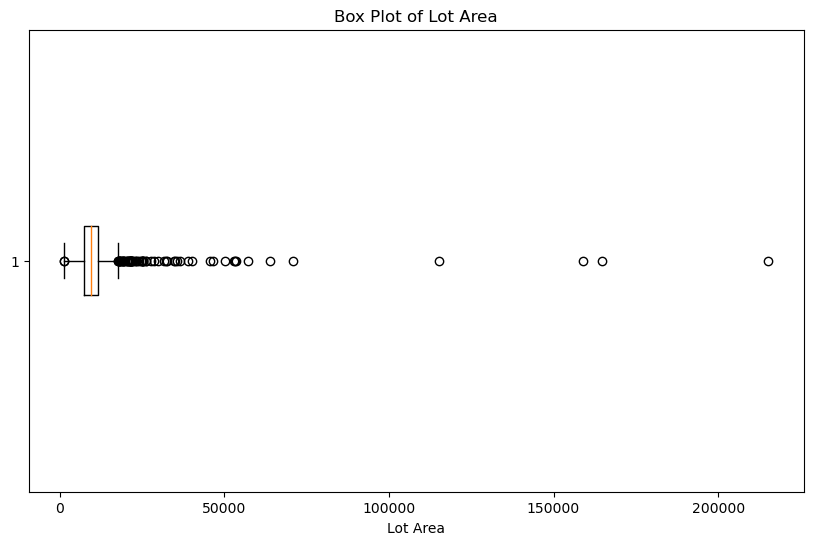

In [149]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["LotArea"], vert=False)
plt.xlabel("Lot Area")
plt.title("Box Plot of Lot Area")
plt.show()

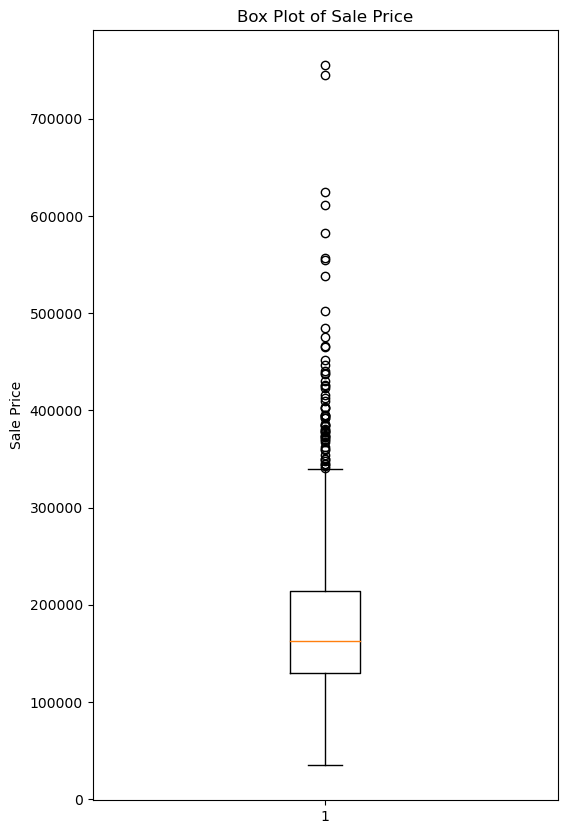

In [150]:
plt.figure(figsize=(6, 10))
plt.boxplot(df["SalePrice"], vert=True)
plt.ylabel("Sale Price")
plt.title("Box Plot of Sale Price")
plt.show()

#### Histogram showing the skewness and outlier possibility

<Axes: >

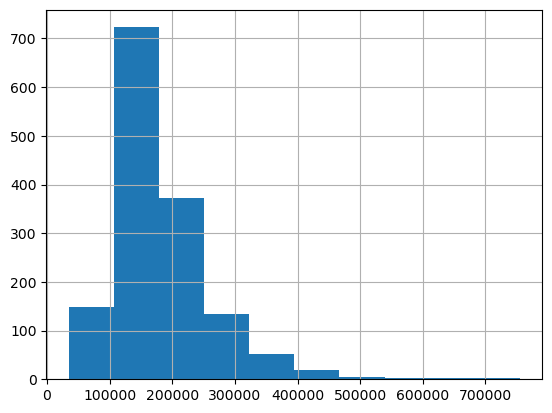

In [151]:
df.SalePrice.hist()

#### Scatter plot to show the relationship between the `Lot area` and `Sales Price`

- The points located to the extreme right of the x-axis or the y-axis indicate outliers

Text(0, 0.5, 'Sales Price')

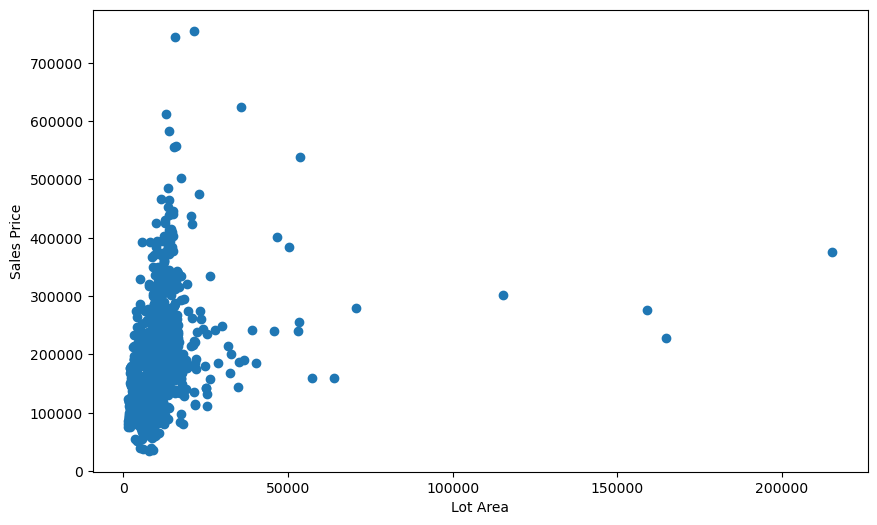

In [152]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df["LotArea"],df["SalePrice"])
ax.set_xlabel("Lot Area")
ax.set_ylabel("Sales Price")

### Quantile based Flooring and Capping

- we do the flooring ( bottom 1%) for the l= lower values and capping (99% percentile ) for the higher values


In [153]:
floor = (df["SalePrice"].quantile(0.01))
cap = (df["SalePrice"].quantile(0.99))
print(f"Floor : {floor}")
print(f"Cap : {cap}")

Floor : 61815.97
Cap : 442567.01000000053


In [154]:
df1 = df.copy()
df1["SalePrice"] = np.where(df1["SalePrice"] < floor, floor, df1["SalePrice"])
df1["SalePrice"] = np.where(df1["SalePrice"] > cap, cap, df1["SalePrice"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4dbae5490>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4dc2c7a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4dc2c5a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4dc2dcfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4dc2dd490>],
 'means': []}

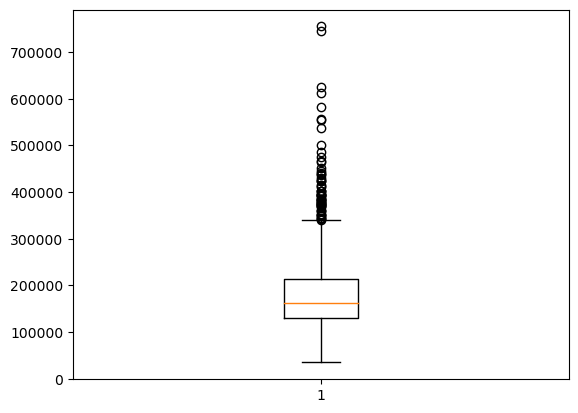

In [155]:
plt.boxplot(df["SalePrice"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4dc345010>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4dc346890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4dc344490>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4dc347f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4dc34c950>],
 'means': []}

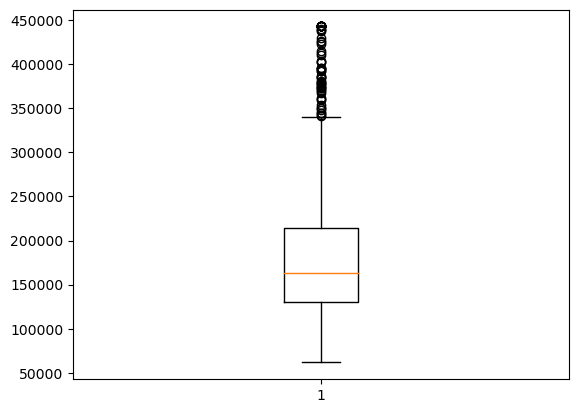

In [156]:
plt.boxplot(df1["SalePrice"])

challenge qsn: use 10% and 90% for flooring and caping

In [157]:
floor = (df["SalePrice"].quantile(0.10))
cap = (df["SalePrice"].quantile(0.90))
print(f"Floor : {floor}")
print(f"Cap : {cap}")

Floor : 106475.0
Cap : 278000.0


In [158]:
df1 = df.copy()
df1["SalePrice"] = np.where(df1["SalePrice"] < floor, floor, df1["SalePrice"])
df1["SalePrice"] = np.where(df1["SalePrice"] > cap, cap, df1["SalePrice"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4dbe746d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4dbe757d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4dbe5fa50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4dbe77490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4dbe77ed0>],
 'means': []}

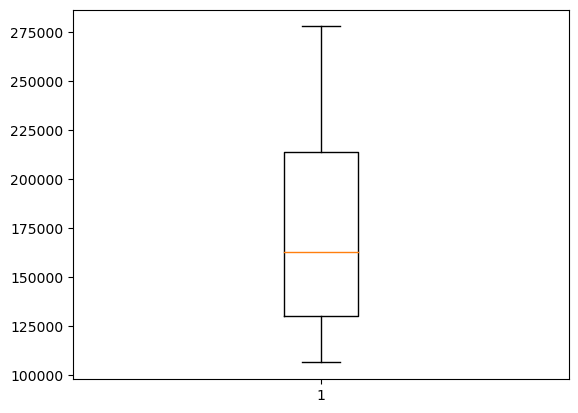

In [159]:
plt.boxplot(df1["SalePrice"])

### Trimming

In [160]:
df2 = df.copy()
print(f"Number of records in the table: {df2.shape}")

Number of records in the table: (1460, 2)


In [161]:
# outliers
index = df2[(df2["SalePrice"] > upper_whisker) | (df2["SalePrice"] < lower_whisker)].index
index = df2.query("SalePrice > upper_whisker or SalePrice < lower_whisker").index
index.shape

(61,)

In [162]:
# removing outliers
df2.drop(index, inplace = True)
df2.shape

(1399, 2)

### Log Transformation

In [163]:
print(df["SalePrice"].skew().round(2))

1.88


In [164]:
df["log_sale"] = df["SalePrice"].map(lambda i : np.log(i) if i>0 else 0)
print(df["log_sale"].skew().round(2))

0.12


<Axes: >

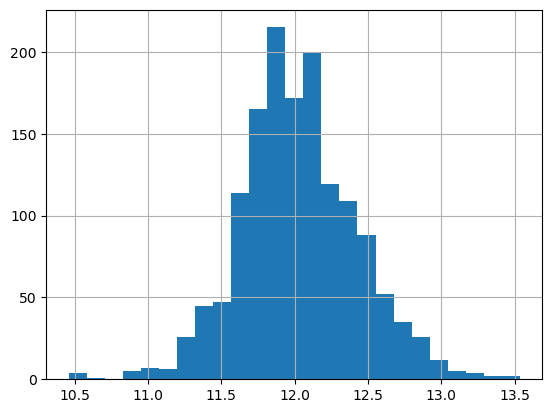

In [165]:
df["log_sale"].hist(bins = 25)

### Discretization
- transform continuous variables into a descrete form
- we do this when we have reason to believe that a numerical feature shoud behave more like a categorical value

In [166]:
from sklearn.preprocessing import Binarizer

In [167]:
age = np.array([[6],
                [12],
                [18],
                [20],
                [36],
                [65]
                ])
binarizer = Binarizer(threshold=18)

In [168]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])

# numPy's Digitize
- below 20 is bin 0
- between 20 and 30 is bin 1
- between 30 and 64 is bin 2
- more than 64 is bin 3

In [173]:
age = np.array([[6],
                [12],
                [18],
                [20],
                [36],
                [65]
                ])
np.digitize(age, bins = [20,30,64])

array([[0],
       [0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

In [174]:
age = np.array([[6],
                [12],
                [18],
                [20],
                [36],
                [65]
                ])
np.digitize(age, bins = [20,30,70])

array([[0],
       [0],
       [0],
       [1],
       [2],
       [2]], dtype=int64)